<a href="https://colab.research.google.com/github/ounospanas/AIDL_B02/blob/main/PyTorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PyTorch is similar to numpy and is more imperative (you do not define graph statically before a model can run) and dynamic: you can define, change and execute nodes as you go, no special session interfaces or placeholders.

In [20]:
import torch

# Custom layer

In [21]:
# sigmoid activation function
def activation(x):
    return 1/(1+torch.exp(-x))

In [22]:
# define x_train
x_features = torch.randn((1, 10))
# random weights with same shape as features
weights = torch.randn_like(x_features)
# bias term
bias = torch.randn((1, 1))

In [23]:
# linear layer
# .view is similar to reshape
a = activation(torch.mm(x_features, weights.view(10,1)) + bias)

# Dense Network

In [24]:
from torchvision import datasets, transforms

# normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)), #(mean),(std) to execute (x-mean)/std
                              ])
# download and load the train FMNIST dataset
trainset = datasets.FashionMNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# download and load the test FMNIST data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [25]:
from torch import nn
import torch.nn.functional as F

In [27]:
class DenseNetwork(nn.Module):
    def __init__(self):
        super().__init__() # mandatory to inherit the same nn.Module  architecture and provide useful methods and attributes

        # layers
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # pass the outputs of the previous layers to the next
        # here the sequence of the operations is defined NOT in __init__
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)

        return x

In [28]:
# init network
model = DenseNetwork()
model

DenseNetwork(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [29]:
# get layer
model.fc1

Linear(in_features=784, out_features=256, bias=True)

In [30]:
# get layer params
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0226,  0.0232,  0.0343,  ...,  0.0128,  0.0195,  0.0104],
        [-0.0345, -0.0198,  0.0215,  ...,  0.0032, -0.0128, -0.0224],
        [ 0.0083,  0.0282,  0.0059,  ...,  0.0016,  0.0292,  0.0037],
        ...,
        [-0.0156, -0.0106,  0.0255,  ...,  0.0079, -0.0301,  0.0255],
        [ 0.0093, -0.0023, -0.0356,  ..., -0.0056, -0.0003,  0.0344],
        [ 0.0030,  0.0174, -0.0145,  ..., -0.0086,  0.0296,  0.0106]],
       requires_grad=True)
Parameter containing:
tensor([-3.1809e-04, -7.9031e-03,  1.5535e-02, -2.8792e-02,  1.8996e-02,
         2.8213e-02, -2.0748e-02, -2.9116e-02, -9.6460e-03, -3.4888e-02,
         2.4986e-02,  2.0182e-02, -2.3285e-02,  8.9166e-03,  3.3204e-02,
        -1.8650e-02, -2.8709e-02,  2.0516e-02,  2.5090e-02,  1.1833e-02,
        -1.4344e-02,  9.0859e-03, -2.5162e-02,  2.2634e-02, -3.3926e-02,
         2.5404e-02,  1.7217e-02,  6.4440e-03,  8.9191e-03, -1.9167e-02,
        -1.2990e-02,  3.1534e-02,  7.7004e-03,  7.2955e-0

In [31]:
# Sequential network example
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [39]:
# loss function
criterion = nn.NLLLoss()

# iter data
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
print(images.shape)

# one forward pass
logits = model(images)
print(logits[0])
# loss
loss = criterion(logits, labels)
print(loss)

loss.backward()
print(model[0].weight.grad)

torch.Size([64, 784])
tensor([-2.2392, -2.1687, -2.3918, -2.4865, -2.3104, -2.3344, -2.3641, -2.2665,
        -2.1022, -2.4249], grad_fn=<SelectBackward0>)
tensor(2.3292, grad_fn=<NllLossBackward0>)
tensor([[ 0.0034,  0.0034,  0.0034,  ...,  0.0037,  0.0034,  0.0034],
        [-0.0063, -0.0063, -0.0063,  ..., -0.0060, -0.0063, -0.0063],
        [ 0.0077,  0.0077,  0.0077,  ...,  0.0078,  0.0077,  0.0077],
        ...,
        [ 0.0034,  0.0034,  0.0034,  ...,  0.0032,  0.0031,  0.0034],
        [-0.0077, -0.0077, -0.0077,  ..., -0.0062, -0.0072, -0.0077],
        [ 0.0008,  0.0008,  0.0008,  ...,  0.0003,  0.0006,  0.0008]])


In [ ]:
from torch import optim

# optimizer MUST have the parameters as input and the lr
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [ ]:
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # flatten images
        images = images.view(images.shape[0], -1)

        # training pass
        # backwards passes with the same parameters, the gradients are accumulated!!! So zero them
        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        print("Training loss {}".format(running_loss/len(trainloader)))

Training loss 1.650742727174942
Training loss 0.8484923669905551
Training loss 0.67926261235656
Training loss 0.6098924789156741
Training loss 0.5662092517243266
Training loss 0.5344411495652026
Training loss 0.5097485205003702
Training loss 0.4913943463455894
Training loss 0.4766071529181273
Training loss 0.4637609955662095


In [ ]:
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 30

train_losses, test_losses = [], []
for e in range(epochs):
    tot_train_loss = 0
    for images, labels in trainloader:

        # flatten images
        images = images.view(images.shape[0], -1)

        # training pass
        # backwards passes with the same parameters, the gradients are accumulated!!! So zero them
        optimizer.zero_grad()

        log_ps = model(images)
        loss = criterion(log_ps, labels)
        tot_train_loss += loss.item()

        loss.backward()
        optimizer.step()
    else:
        tot_test_loss = 0
        test_correct = 0  # Number of correct predictions on the test set

        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                # flatten images
                images = images.view(images.shape[0], -1)

                log_ps = model(images)
                loss = criterion(log_ps, labels)
                tot_test_loss += loss.item()

                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                test_correct += equals.sum().item()

        # Get mean loss to enable comparison between train and test sets
        train_loss = tot_train_loss / len(trainloader.dataset)
        test_loss = tot_test_loss / len(testloader.dataset)

        # At completion of epoch
        train_losses.append(train_loss)
        test_losses.append(test_loss)

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_loss),
              "Test Loss: {:.3f}.. ".format(test_loss),
              "Test Accuracy: {:.3f}".format(test_correct / len(testloader.dataset)))

Epoch: 1/30..  Training Loss: 0.027..  Test Loss: 0.017..  Test Accuracy: 0.706
Epoch: 2/30..  Training Loss: 0.013..  Test Loss: 0.011..  Test Accuracy: 0.746
Epoch: 3/30..  Training Loss: 0.010..  Test Loss: 0.010..  Test Accuracy: 0.771
Epoch: 4/30..  Training Loss: 0.009..  Test Loss: 0.009..  Test Accuracy: 0.784
Epoch: 5/30..  Training Loss: 0.009..  Test Loss: 0.009..  Test Accuracy: 0.792
Epoch: 6/30..  Training Loss: 0.008..  Test Loss: 0.009..  Test Accuracy: 0.805
Epoch: 7/30..  Training Loss: 0.008..  Test Loss: 0.008..  Test Accuracy: 0.811
Epoch: 8/30..  Training Loss: 0.008..  Test Loss: 0.008..  Test Accuracy: 0.815
Epoch: 9/30..  Training Loss: 0.007..  Test Loss: 0.008..  Test Accuracy: 0.820
Epoch: 10/30..  Training Loss: 0.007..  Test Loss: 0.008..  Test Accuracy: 0.823
Epoch: 11/30..  Training Loss: 0.007..  Test Loss: 0.008..  Test Accuracy: 0.828
Epoch: 12/30..  Training Loss: 0.007..  Test Loss: 0.008..  Test Accuracy: 0.824
Epoch: 13/30..  Training Loss: 0.007.

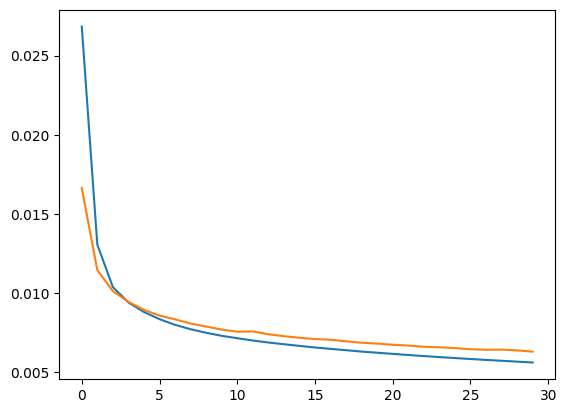

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')

# save and load model

In [ ]:
torch.save(model.state_dict(), 'checkpoint.pt')

In [ ]:
state_dict = torch.load('checkpoint.pt')
model.load_state_dict(state_dict)

<All keys matched successfully>

# Inference

In [ ]:
# set the model in inference mode
model.eval()

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
img = img.view(1, 784)

# compute class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

tensor(2)


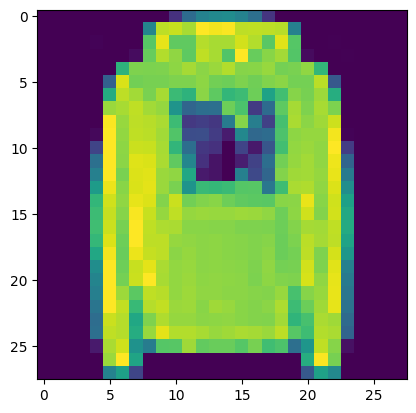

In [ ]:
print(labels[0])
plt.imshow(images[0][0])

In [ ]:
torch.argmax(ps)

tensor(2)

In [ ]:
ps.topk(1, dim=1)

torch.return_types.topk(
values=tensor([[0.5898]]),
indices=tensor([[2]]))

# CNN
https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
